In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, arange, signal
import pandas as pd
plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
dustin_light_1 = pd.read_csv('20984_var_test.csv')
snout_array = dustin_light_1.RFLy #we are using Forelimb here, but try other body parts like Snouty or Tailtipy

In [3]:
# normalizes the mean 
snout_norm = np.array(snout_array - np.mean(snout_array))

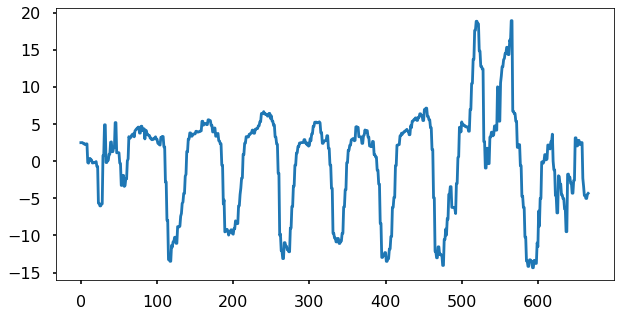

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(snout_norm)

In [5]:
zero_crossings = np.where(np.diff(np.sign(snout_norm)))[0]
print(zero_crossings)

[  8  10  14  28  32  34  50  60 110 138 184 212 258 282 326 350 388 414
 462 494 530 532 534 536 576 608 619 648 658]


In [6]:
# CODE FROM: http://qingkaikong.blogspot.com/2017/01/signal-processing-finding-periodic.html
# and https://stackoverflow.com/questions/3843017/efficiently-detect-sign-changes-in-python

def freq_zero_crossing(sig):
    """
    Frequency estimation from zero crossing method
    sig - input signal
    fs - sampling rate
    
    return: 
    dominant period
    """
    
    indices = np.where(np.diff(np.sign(sig)))[0]

    # Let's calculate the real crossings by interpolate
    crossings = [i - sig[i] / (sig[i+1] - sig[i]) for i in indices]
    
    # Let's get the time between each crossing
    # the diff function will get how many samples between each crossing
    # we divide the sampling rate to get the time between them
    delta_t = np.diff(crossings) / 1
    
    # Get the mean value for the period
    period = np.mean(delta_t)
    
    return period

period_from_zero_crossing = freq_zero_crossing(snout_norm)
print('The period estimation is %.1f frames'%(period_from_zero_crossing))

The period estimation is 23.2 frames


In [7]:
# get the frequency and spectrum
f, Pxx = signal.periodogram(snout_norm, fs = 1, window='hanning', scaling='spectrum')

Text(0, 0.5, 'Spectrum Amplitude')

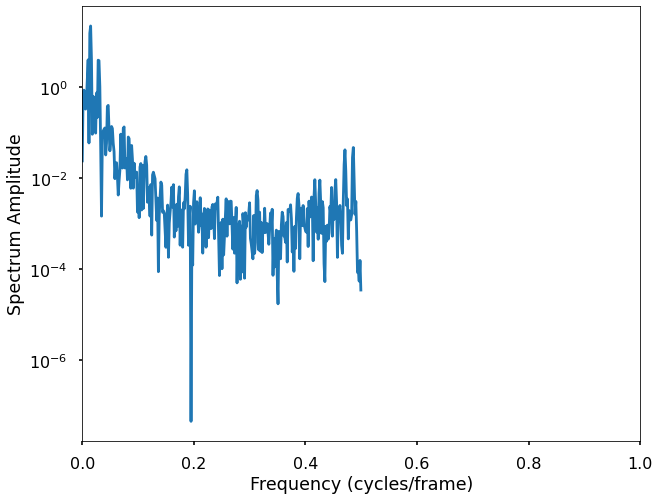

In [8]:
plt.figure(figsize = (10, 8))
plt.plot(f, Pxx)
plt.xlim(0, 1)
plt.yscale('log')
plt.xlabel('Frequency (cycles/frame)')
plt.ylabel('Spectrum Amplitude')

In [9]:
# print the top periods in the signal
for amp_arg in np.argsort(np.abs(Pxx))[::-1][1:7]:
    frame = 1 / f[amp_arg]
    print(frame)

74.11111111111111
60.63636363636363
95.28571428571428
35.10526315789474
33.35
111.16666666666667


In [10]:
# ok now let's try autocorrelation, again from the blog post 
from statsmodels import api as sm

In [11]:
# get the autocorrelation coefficient at given lags
acf = sm.tsa.acf(snout_norm, nlags=len(snout_norm),fft=False)

Text(0, 0.5, 'Autocorrelation')

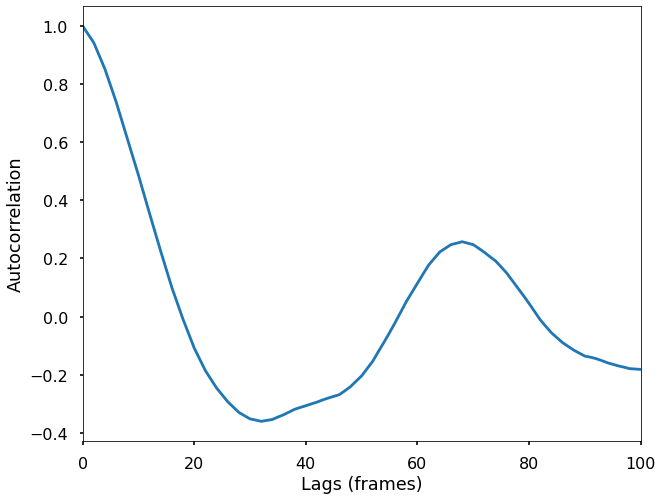

In [12]:
# peaks looks like they are at 0 days, 42, days, and 84 days, so the period defined by autocorrelation is 42. 
plt.figure(figsize = (10, 8))
lag = np.arange(len(snout_norm)) / 1
plt.plot(lag, acf)
plt.xlim((0, 100))
plt.xlabel('Lags (frames)')
plt.ylabel('Autocorrelation')

DFT works by fitting sine and cosine waves of different frequencies to the time series data. The correlation between the sine and cosine wave of specific frequency then becomes the value of that frequency in the frequency spectrum. 

In [13]:
# Code from: http://pyageng.mpastell.com/book/spectrum.html
from pylab import *
f, Sk = signal.periodogram(snout_norm, nfft = 100, return_onesided = True,scaling = "spectrum")
# Check that sum(Sk) equals variance of x
#sum(Sk) == var(x)

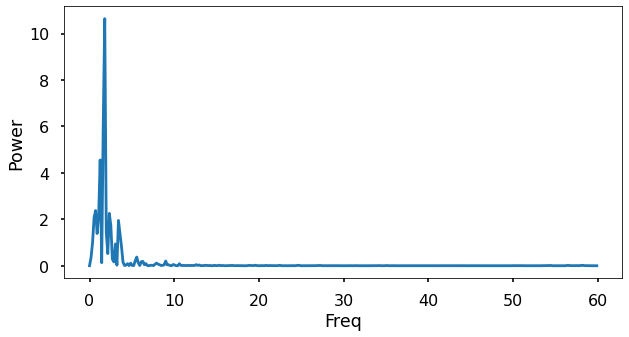

In [14]:
# Code from: http://pyageng.mpastell.com/book/spectrum.html and from: scipy.signal.periodogram
from scipy import signal
from pylab import *
f, Pxx_den = signal.periodogram(snout_norm, fs=120, return_onesided = True,scaling = "spectrum")
# Check that sum(Sk) equals variance of x
#sum(Sk) == var(x)

plt.figure(figsize = (10, 5))
plt.plot(f, Pxx_den)
plt.ylabel('Power')
plt.xlabel('Freq')
plt.show()
